**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [2]:
TXT_FOLDER = "encode_rnaseq"

## Import data

In [4]:
txt_folder = TXT_FOLDER
txt_fdiry  = file.path(FD_DAT, "external", txt_folder)

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

K562.hg38.ENCSR615EEK.ENCFF421TJX.RNAseq.total.tsv 
K562.hg38.ENCSR615EEK.ENCFF585HTZ.RNAseq.total.strand_pos.bw 
K562.hg38.ENCSR615EEK.ENCFF876JOV.RNAseq.total.strand_neg.bw 
run_download.log.txt 
run_download.sh 


In [5]:
### set file path
txt_folder = TXT_FOLDER
txt_fdiry  = file.path(FD_DAT, "external", txt_folder)
txt_fname  = "K562.hg38.ENCSR615EEK.ENCFF421TJX.RNAseq.total.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### show and assign
dat_rnaseq_import = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 59526    17


gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
10904,10904,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12954,12954,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12956,12956,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12958,12958,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12960,12960,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12962,12962,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Explore

In [6]:
dat = dat_rnaseq_import
summary(dat$TPM)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.00      0.00      0.00     16.80      0.54 152445.71 

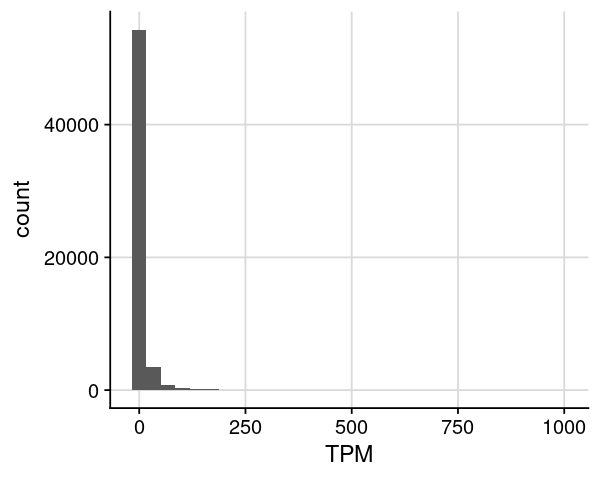

In [24]:
dat = dat_rnaseq_import
dat = dat %>% dplyr::filter(TPM <= 1000)
gpt = ggplot(dat, aes(x=TPM)) +
    geom_histogram(bins=30) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=4, repr.plot.width=5)
print(gpt)

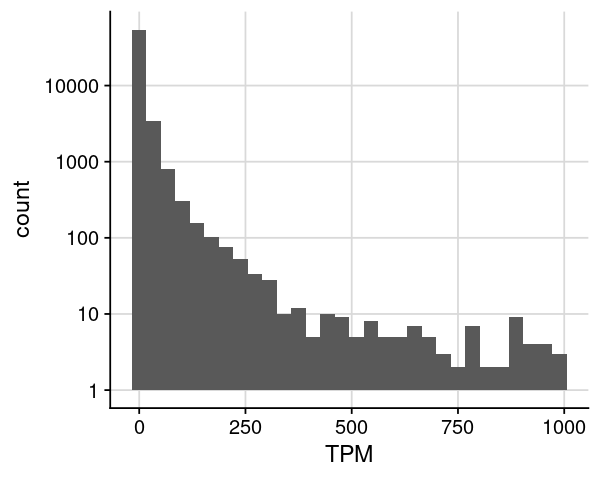

In [25]:
dat = dat_rnaseq_import
dat = dat %>% dplyr::filter(TPM <= 1000)
gpt = ggplot(dat, aes(x=TPM)) +
    geom_histogram(bins=30) +
    scale_y_log10() +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=4, repr.plot.width=5)
print(gpt)

## Summary

**Number of genes with TMP > 1**

In [28]:
dat = dat_rnaseq_import
num1 = nrow(dat)

dat = dat %>% dplyr::filter(TPM > 1)
num2 = nrow(dat)

cat("",
    "#{Gene | Total } =", num1, "\n",
    "#{Gene | TPM>=1} =", num2, "\n"
)

 #{Gene | Total } = 59526 
 #{Gene | TPM>=1} = 13184 
